# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [3]:
employee = pd.read_csv('data/Employee.csv')

In [5]:
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [11]:
employee.groupby(['Department'])[['Salary']].mean()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [15]:
employee.pivot_table(index='Department', values='Salary', aggfunc='mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [16]:
employee.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc='mean')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [18]:
employee.pivot_table(index=['Department', 'Title'], columns='Years', values='Salary')

Years                    1     2     3     4     7     8
Department Title                                        
HR         VP          NaN   NaN   NaN   NaN   NaN  70.0
           analyst     NaN  30.0   NaN  35.0   NaN   NaN
IT         VP          NaN   NaN   NaN   NaN   NaN  70.0
           analyst    35.0  30.0   NaN   NaN   NaN   NaN
           associate   NaN   NaN   NaN   NaN  60.0   NaN
Sales      associate   NaN  55.0  55.0   NaN   NaN   NaN

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [27]:
employee.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc=['mean', 'count'])

mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [21]:
employee.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc=['min', 'mean', 'median', 'max', 'std'])

min   mean median    max       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP            70   70.0   70.0     70       NaN
           analyst       30   32.5   32.5     35  3.535534
IT         VP            70   70.0   70.0     70       NaN
           analyst       30   32.5   32.5     35  3.535534
           associate     60   60.0   60.0     60       NaN
Sales      associate     55   55.0   55.0     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [24]:
#as there is no standard deviation for a single value i shoul replace it with a null value or zero
employee.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc=['min', 'mean', 'median', 'max', 'std']).fillna(0)

min   mean median    max       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP            70   70.0   70.0     70  0.000000
           analyst       30   32.5   32.5     35  3.535534
IT         VP            70   70.0   70.0     70  0.000000
           analyst       30   32.5   32.5     35  3.535534
           associate     60   60.0   60.0     60  0.000000
Sales      associate     55   55.0   55.0     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [26]:
employee.pivot_table(index=['Department'], values='Salary', aggfunc=['sum', 'count'])

,sum,count
,Salary,Salary
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [28]:
employee.pivot_table(index=['Department', 'Title'], values=['Years','Salary'], aggfunc={'Years': 'sum', 'Salary': 'mean'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [80]:
def mean_nomax(col):
    return col[col['Salary'] != col['Salary'].max()]['Salary'].mean()

In [81]:
employee.pivot_table(index='Department', values='Salary', aggfunc=mean_nomax)

,Salary
Department,
HR,32.500000
IT,41.666667


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [82]:
fitbit = pd.read_csv('data/Fitbit.csv')

In [88]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [87]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [85]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [90]:
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [91]:
import matplotlib.pyplot as plt

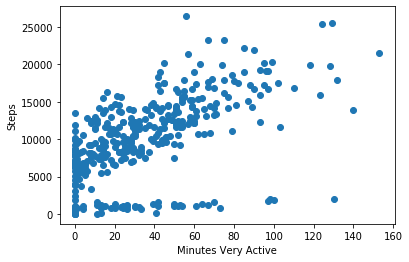

In [93]:
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps');

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
#the more "minute very active" results in more "steps" in most cases

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [94]:
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

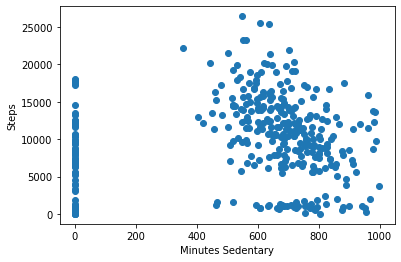

In [95]:
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps');

In [22]:
#they don't seem to have correlation

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [96]:
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

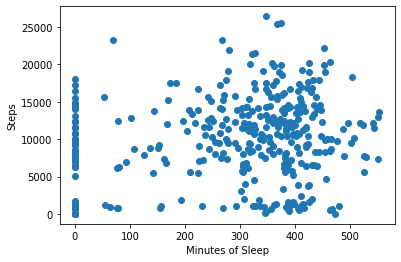

In [97]:
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.xlabel('Minutes of Sleep')
plt.ylabel('Steps');

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [98]:
columns = ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [101]:
cor_fit = fitbit[columns].corr()

In [102]:
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [105]:
cor_fit.sort_values('Steps', ascending=False)['Steps']

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [106]:
time_grades = pd.read_csv('data/Time_Grades.csv')

In [107]:
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

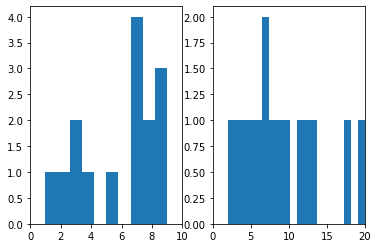

In [139]:
fig, ax = plt.subplots(1, 2)
ax[0].hist(time_grades['Grade'], bins=10)
ax[1].hist(time_grades['Study time'], bins=20)
ax[0].set_xlim(0, 10)
ax[1].set_xlim(0, 20);

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [114]:
time_grades['Study time'].corr(time_grades['Grade'])

0.7980456073578858

In [115]:
time_grades['Study time'].corr(time_grades['Grade'], method='spearman')

0.819658753036942

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

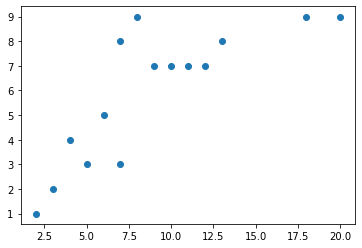

In [142]:
plt.scatter(time_grades['Study time'], time_grades['Grade'])

In [118]:
#after some time studying the notes hit some kind of roof

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#pearson tries to fit the points into a linear function
#spearman tries to fit the points into a non linear function